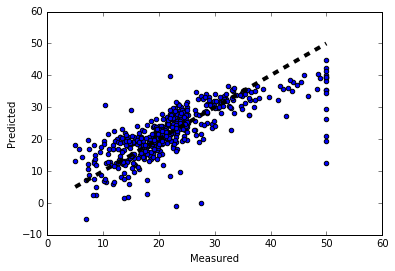

In [20]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import atleast_2d as twod
from numpy import asarray as arr
from numpy import asmatrix as ma
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

def splitData(X, Y=None, train_fraction=0.80):
    """
    Split data into training and test data.

    Parameters
    ----------
    X : MxN numpy array of data to split
    Y : Mx1 numpy array of associated target values
    train_fraction : float, fraction of data used for training (default 80%)

    Returns
    -------
    to_return : (Xtr,Xte,Ytr,Yte) or (Xtr,Xte)
        A tuple containing the following arrays (in order): training
        data from X, testing data from X, training labels from Y
        (if Y contains data), and testing labels from Y (if Y 
        contains data).
    """
    nx,dx = twod(X).shape
    ne = round(train_fraction * nx)

    Xtr,Xte = X[:ne,:], X[ne:,:]
    to_return = (Xtr,Xte)

    if Y is not None:
        Y = arr(Y).flatten()
        ny = len(Y)
        if ny > 0:
            assert ny == nx, 'splitData: X and Y must have the same length'
            Ytr,Yte = Y[:ne], Y[ne:]
            to_return += (Ytr,Yte)

    return to_return


# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris_master = load_iris()
X,Xte,y,Yte = splitData(iris_master.data,np.array(iris_master.target),train_fraction=.5)
_,f = X.shape
pairidx = 0
pair = [0,3]

# for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
#                                 [1, 2], [1, 3], [2, 3]]):
# We only take the two corresponding features

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Train
for i in range(1, f):
    clf = DecisionTreeRegressor(max_depth=i).fit(X, y)
    y_hat = clf.predict(Xte)
    print np.mean(np.sum( (y_hat - mat(self.predict(X)))**2 , axis=0))


/Users/schweer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/schweer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


NameError: name 'mat' is not defined